# Analysis of COVID-19 Data

So we start off by querying the versions of packages used. Knowing this always helps when it comes to debugging certain problems.

In [1]:
import pandas as pd
print("Pandas Version = " + pd.__version__)
import numpy as np
print("Numpy Version = " + np.__version__)
import matplotlib
print("Matplotlib Version = " + matplotlib.__version__)
from IPython.display import display

# plotting essentials
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16, 10)
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.pyplot.style.use('tableau-colorblind10') # this is a necessity

Pandas Version = 1.0.3
Numpy Version = 1.18.4
Matplotlib Version = 3.2.1


Now the data is being fetched from the url provided by "Our World in Data", which you can learn more about by visiting this [link](https://github.com/owid/covid-19-data/tree/master/public/data). 

I thank the collaborators of "Our World in Data" for their awesome work of accumulating the COVID-19 testing rates for every country along with all other relevant information. The data is updated on a daily basis.

In [2]:
data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
data["location"] = data["location"].apply(lambda x: x.title())
data.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


Below is a utility function to print the dictionary of dataframes, which will be needed later in this code.

In [3]:
def print_dictionary(dictionary):
    for i in dictionary:
        print("\nRows for " + i + ":")
        
        print("Number of NaN testing values is " + str(sum(dictionary[i]["total_tests"].isna().astype(int)))\
              + " out of " + str(dictionary[i].shape[0]) + " values")
        display(dictionary[i])

At first let's have a look at the countries that the dataset has information about.

In [4]:
countries_in_data = data["location"].unique()

display(list(countries_in_data))

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua And Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius And Saba',
 'Bosnia And Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote D'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic Of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faeroe Islands',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 

The variable "country_to_analyze" can be modified to include countries of your choice in the analysis. I set "countries_to_analyze" to Bangladesh (Bangladesh is where I am from), United States and India as default. Please do not use "World" or "International" as corresponding data for the total tests done are not present in the dataset.

In [5]:
countries_to_analyze = ["bangladesh", "india", "pakistan", "united states", "australia"] 

countries_to_analyze = [country.title() for country in countries_to_analyze]

for country in countries_to_analyze:
    if(not(country in countries_in_data)):
        print(country + " not in data, dropping...")
        countries_to_analyze.remove(country)
        
print("Countries being analyzed: ")
display(countries_to_analyze)

Countries being analyzed: 


['Bangladesh', 'India', 'Pakistan', 'United States', 'Australia']

A dictionary of dataframes corresponding to each country specified in "countries_to_analyze" is made and the indexes of any dataframe is changed to the calendar date of each row of that dataframe. 

In [6]:
dataframe_dictionary = {country: data[data["location"] == country]\
                        [["date", "total_deaths", "total_tests", "total_cases"]]\
                        for country in countries_to_analyze}

for country in dataframe_dictionary:
    dataframe_dictionary[country]["date"] = pd.to_datetime(dataframe_dictionary[country]["date"])
    dataframe_dictionary[country] = dataframe_dictionary[country].set_index("date")

print_dictionary(dataframe_dictionary)


Rows for Bangladesh:
Number of NaN testing values is 3 out of 106 values


,total_deaths,total_tests,total_cases
date,,,
2020-03-04,NaN,108.0,NaN
2020-03-05,NaN,111.0,NaN
2020-03-06,NaN,NaN,NaN
2020-03-07,NaN,120.0,NaN
2020-03-08,NaN,127.0,NaN
...,...,...,...
2020-06-13,1095.0,489960.0,81523.0
2020-06-14,1139.0,504465.0,84379.0
2020-06-15,1171.0,519503.0,87520.0



Rows for India:
Number of NaN testing values is 84 out of 169 values


,total_deaths,total_tests,total_cases
date,,,
2019-12-31,0.0,NaN,0.0
2020-01-01,0.0,NaN,0.0
2020-01-02,0.0,NaN,0.0
2020-01-03,0.0,NaN,0.0
2020-01-04,0.0,NaN,0.0
...,...,...,...
2020-06-13,8884.0,5507182.0,308993.0
2020-06-14,9195.0,5658614.0,320922.0
2020-06-15,9520.0,5774133.0,332424.0



Rows for Pakistan:
Number of NaN testing values is 67 out of 165 values


,total_deaths,total_tests,total_cases
date,,,
2019-12-31,0.0,NaN,0.0
2020-01-01,0.0,NaN,0.0
2020-01-02,0.0,NaN,0.0
2020-01-03,0.0,NaN,0.0
2020-01-04,0.0,NaN,0.0
...,...,...,...
2020-06-13,2551.0,839019.0,132405.0
2020-06-14,2632.0,868565.0,139230.0
2020-06-15,2729.0,897650.0,144478.0



Rows for United States:
Number of NaN testing values is 147 out of 170 values


,total_deaths,total_tests,total_cases
date,,,
2019-12-31,0.0,NaN,0.0
2020-01-01,0.0,NaN,0.0
2020-01-02,0.0,NaN,0.0
2020-01-03,0.0,NaN,0.0
2020-01-04,0.0,NaN,0.0
...,...,...,...
2020-06-13,114669.0,NaN,2048986.0
2020-06-14,115436.0,NaN,2074526.0
2020-06-15,115732.0,23467981.0,2094069.0



Rows for Australia:
Number of NaN testing values is 96 out of 170 values


,total_deaths,total_tests,total_cases
date,,,
2019-12-31,0.0,NaN,0.0
2020-01-01,0.0,NaN,0.0
2020-01-02,0.0,NaN,0.0
2020-01-03,0.0,NaN,0.0
2020-01-04,0.0,NaN,0.0
...,...,...,...
2020-06-13,102.0,1782651.0,7290.0
2020-06-14,102.0,1812353.0,7302.0
2020-06-15,102.0,1828149.0,7320.0


Two new columns in each dataframe is create, one containing total deaths due to COVID-19 as a percentage of total tests, and the other containing total cases of COVID-19 as a percentage of total tests carried out. 

This step, however, may overestimate or underestimate the COVID-19 situation just like any other statistical metric, such as the Case Fatality Rate (CFR). You may visit this [link](https://ourworldindata.org/covid-mortality-risk) to read more about relevant statistical metrics and their pros and cons. 

If you do read the article, you will come across the line "<em>...the total number of cases of COVID-19 is not known. That’s partly because not everyone with COVID-19 is tested</em>". <b>This, in fact, is the motivation behind generating the plots in this notebook</b>.

In [7]:
for country in dataframe_dictionary:
    dataframe_dictionary[country] = dataframe_dictionary[country].interpolate(method = "time",\
                                                                             limit_direction = "both")
    dataframe_dictionary[country]["deaths_as_percentage_of_tests"] = \
    (dataframe_dictionary[country]["total_deaths"] / dataframe_dictionary[country]["total_tests"]) * 100
    
    dataframe_dictionary[country]["cases_as_percentage_of_tests"] = \
    (dataframe_dictionary[country]["total_cases"] / dataframe_dictionary[country]["total_tests"]) * 100
    
print_dictionary(dataframe_dictionary)


Rows for Bangladesh:
Number of NaN testing values is 0 out of 106 values


,total_deaths,total_tests,total_cases,deaths_as_percentage_of_tests,cases_as_percentage_of_tests
date,,,,,
2020-03-04,0.0,108.0,3.0,0.000000,2.777778
2020-03-05,0.0,111.0,3.0,0.000000,2.702703
2020-03-06,0.0,115.5,3.0,0.000000,2.597403
2020-03-07,0.0,120.0,3.0,0.000000,2.500000
2020-03-08,0.0,127.0,3.0,0.000000,2.362205
...,...,...,...,...,...
2020-06-13,1095.0,489960.0,81523.0,0.223488,16.638705
2020-06-14,1139.0,504465.0,84379.0,0.225784,16.726433
2020-06-15,1171.0,519503.0,87520.0,0.225408,16.846871



Rows for India:
Number of NaN testing values is 0 out of 169 values


,total_deaths,total_tests,total_cases,deaths_as_percentage_of_tests,cases_as_percentage_of_tests
date,,,,,
2019-12-31,0.0,6500.0,0.0,0.000000,0.000000
2020-01-01,0.0,6500.0,0.0,0.000000,0.000000
2020-01-02,0.0,6500.0,0.0,0.000000,0.000000
2020-01-03,0.0,6500.0,0.0,0.000000,0.000000
2020-01-04,0.0,6500.0,0.0,0.000000,0.000000
...,...,...,...,...,...
2020-06-13,8884.0,5507182.0,308993.0,0.161317,5.610728
2020-06-14,9195.0,5658614.0,320922.0,0.162496,5.671389
2020-06-15,9520.0,5774133.0,332424.0,0.164873,5.757124



Rows for Pakistan:
Number of NaN testing values is 0 out of 165 values


,total_deaths,total_tests,total_cases,deaths_as_percentage_of_tests,cases_as_percentage_of_tests
date,,,,,
2019-12-31,0.0,471.0,0.0,0.000000,0.000000
2020-01-01,0.0,471.0,0.0,0.000000,0.000000
2020-01-02,0.0,471.0,0.0,0.000000,0.000000
2020-01-03,0.0,471.0,0.0,0.000000,0.000000
2020-01-04,0.0,471.0,0.0,0.000000,0.000000
...,...,...,...,...,...
2020-06-13,2551.0,839019.0,132405.0,0.304046,15.780930
2020-06-14,2632.0,868565.0,139230.0,0.303029,16.029888
2020-06-15,2729.0,897650.0,144478.0,0.304016,16.095137



Rows for United States:
Number of NaN testing values is 0 out of 170 values


,total_deaths,total_tests,total_cases,deaths_as_percentage_of_tests,cases_as_percentage_of_tests
date,,,,,
2019-12-31,0.0,9.724879e+06,0.0,0.000000,0.000000
2020-01-01,0.0,9.724879e+06,0.0,0.000000,0.000000
2020-01-02,0.0,9.724879e+06,0.0,0.000000,0.000000
2020-01-03,0.0,9.724879e+06,0.0,0.000000,0.000000
2020-01-04,0.0,9.724879e+06,0.0,0.000000,0.000000
...,...,...,...,...,...
2020-06-13,114669.0,2.334981e+07,2048986.0,0.491092,8.775172
2020-06-14,115436.0,2.340890e+07,2074526.0,0.493129,8.862127
2020-06-15,115732.0,2.346798e+07,2094069.0,0.493149,8.923090



Rows for Australia:
Number of NaN testing values is 0 out of 170 values


,total_deaths,total_tests,total_cases,deaths_as_percentage_of_tests,cases_as_percentage_of_tests
date,,,,,
2019-12-31,0.0,143056.0,0.0,0.000000,0.000000
2020-01-01,0.0,143056.0,0.0,0.000000,0.000000
2020-01-02,0.0,143056.0,0.0,0.000000,0.000000
2020-01-03,0.0,143056.0,0.0,0.000000,0.000000
2020-01-04,0.0,143056.0,0.0,0.000000,0.000000
...,...,...,...,...,...
2020-06-13,102.0,1782651.0,7290.0,0.005722,0.408942
2020-06-14,102.0,1812353.0,7302.0,0.005628,0.402902
2020-06-15,102.0,1828149.0,7320.0,0.005579,0.400405


<!-- An outer join of columns containing the calculated percentages related to total deaths for the countries of interest is done and each column is renamed after the country it corresponds to. 

The outer join will create "NaN" values as some countries do not have data on certain dates, and there will also be "Inf" values present due to situations like "division by zero". Instead of keeping them blank, they have been filled with zeros, as technically, the entries with "infinite" or "not a number" values are the entries when no cases or deaths have been reported in the data. -->

In [8]:
data_plot_deaths = pd.concat([v["deaths_as_percentage_of_tests"]\
                              .rename(k)\
                              for k, v in dataframe_dictionary.items()], axis=1)

data_plot_deaths = data_plot_deaths.replace(np.inf, np.nan)

data_plot_deaths

,Bangladesh,India,Pakistan,United States,Australia
date,,,,,
2019-12-31,NaN,0.000000,0.000000,0.000000,0.000000
2020-01-01,NaN,0.000000,0.000000,0.000000,0.000000
2020-01-02,NaN,0.000000,0.000000,0.000000,0.000000
2020-01-03,NaN,0.000000,0.000000,0.000000,0.000000
2020-01-04,NaN,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2020-06-13,0.223488,0.161317,0.304046,0.491092,0.005722
2020-06-14,0.225784,0.162496,0.303029,0.493129,0.005628
2020-06-15,0.225408,0.164873,0.304016,0.493149,0.005579


<!-- Operations similar to the ones done in the previous cell is done for the calculated percentages related to total cases. -->

In [9]:
data_plot_cases = pd.concat([v["cases_as_percentage_of_tests"]\
                              .rename(k)\
                              for k, v in dataframe_dictionary.items()], axis=1)

data_plot_cases = data_plot_cases.replace(np.inf, np.nan)

data_plot_cases

,Bangladesh,India,Pakistan,United States,Australia
date,,,,,
2019-12-31,NaN,0.000000,0.000000,0.000000,0.000000
2020-01-01,NaN,0.000000,0.000000,0.000000,0.000000
2020-01-02,NaN,0.000000,0.000000,0.000000,0.000000
2020-01-03,NaN,0.000000,0.000000,0.000000,0.000000
2020-01-04,NaN,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2020-06-13,16.638705,5.610728,15.780930,8.775172,0.408942
2020-06-14,16.726433,5.671389,16.029888,8.862127,0.402902
2020-06-15,16.846871,5.757124,16.095137,8.923090,0.400405


Ladies and gentlemen, here I present to you, the most eagerly anticipated plots of the year!
Just kidding!

Text(0, 0.5, 'Percentage (%)')

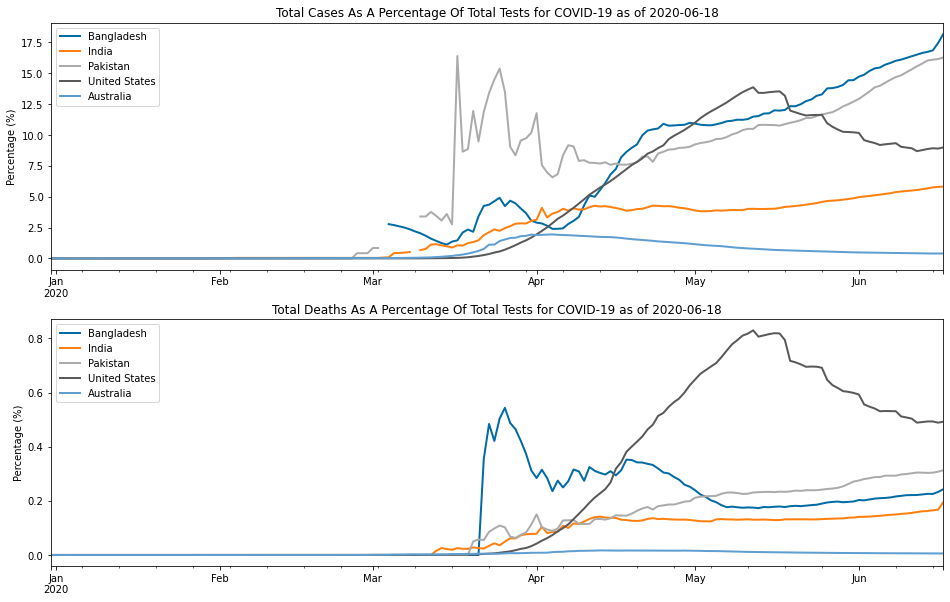

In [10]:
fig, axes = matplotlib.pyplot.subplots(nrows=2, ncols=1)

ax1 = data_plot_cases.plot(ax = axes[0], title = "Total Cases As A Percentage Of Total Tests for COVID-19 as of " + str(pd.to_datetime("now").date()))
ax1.set_xlabel("")
ax1.set_ylabel("Percentage (%)")
ax2 = data_plot_deaths.plot(ax = axes[1], title = "Total Deaths As A Percentage Of Total Tests for COVID-19 as of " + str(pd.to_datetime("now").date()))
ax2.set_xlabel("")
ax2.set_ylabel("Percentage (%)")

If you want to save the plots, uncomment the line below and re-run the notebook.

In [11]:
fig.savefig("covid-analysis.png", dpi=300, bbox_inches = 'tight')